# Twitch Data Cleaning and EDA

Chao Shi

5/7/2017

@NYC Data Science Academy

chao.shi.datasci at gmail dot com

## Overview

14000+ rows of twitch channel info and 2000+ rows of twitch team info are scraped from https://www.twitchtools.com

Here we perform the data cleaning and EDA steps. Eventually the channel-team interaction is planned to be shown with interactive graphs, so the 'node' and 'edge' data are being prepared here.

In [1]:
%matplotlib inline

In [2]:
# import packages
import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd data_safe

/Users/chao/git_proj/scrapy_ttools/data_safe


In [4]:
ls

channelsinfo_clean.csv        twitchtools_channelsinfo.csv
testc2g.csv                   twitchtools_teams.csv
twitchtools_channels.csv      twitchtools_teamsinfo.csv


In [5]:
channels     = pd.read_csv('twitchtools_channels.csv')
channelsinfo = pd.read_csv('twitchtools_channelsinfo.csv')
teams     = pd.read_csv('twitchtools_teams.csv')
teamsinfo = pd.read_csv('twitchtools_teamsinfo.csv')

In [6]:
channels.head()

,username,thumbnail,nfollowers,subfolder
0,Janowicz,https://static-cdn.jtvnw.net/jtv_user_pictures...,"51,924 followers",/channel/janowicz
1,SoloRenektonOnly,https://static-cdn.jtvnw.net/jtv_user_pictures...,"51,832 followers",/channel/solorenektononly
2,미라지오빠,https://static-cdn.jtvnw.net/jtv_user_pictures...,"51,826 followers",/channel/mirage720
3,cnotbusch,https://static-cdn.jtvnw.net/jtv_user_pictures...,"51,770 followers",/channel/cnotbusch
4,GruntarTV,https://static-cdn.jtvnw.net/jtv_user_pictures...,"51,761 followers",/channel/gruntartv


In [7]:
# print channelsinfo.dtypes
# print channelsinfo.describe()
# channelsinfo.columns.values.tolist()
channelsinfo.head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date
0,Yes,https://www.twitchtools.com/channel/janowicz,Janowicz,"April 29, 2017, 13:35 GMT+0000",Polskie Strumyki,Counter-Strike: Global Offensive,"51,924",106953429,https://www.twitch.tv/janowicz,"608,225",No,"November 13, 2015, 01:21 GMT+0000"
1,Yes,https://www.twitchtools.com/channel/solorenekt...,SoloRenektonOnly,"April 29, 2017, 14:35 GMT+0000",did not join any team,League of Legends,"51,832",30227322,https://www.twitch.tv/solorenektononly,"2,130,376",No,"May 2, 2012, 18:43 GMT+0000"
2,Yes,https://www.twitchtools.com/channel/mirage720,미라지오빠,"April 29, 2017, 16:05 GMT+0000",did not join any team,Talk Shows,"51,826",137724090,https://www.twitch.tv/mirage720,"1,111,559",No,"October 23, 2016, 11:54 GMT+0000"
3,Yes,https://www.twitchtools.com/channel/cnotbusch,cnotbusch,"April 29, 2017, 11:04 GMT+0000",Creeper Crew;Creators;Game Artists,For Honor,"51,770",25999696,https://www.twitch.tv/cnotbusch,"3,894,469",No,"November 8, 2011, 01:36 GMT+0000"
4,Yes,https://www.twitchtools.com/channel/gruntartv,GruntarTV,"April 29, 2017, 14:02 GMT+0000",Keep Gaming,Dungeons & Dragons,"51,761",20572303,https://www.twitch.tv/gruntartv,"3,971,528",No,"February 19, 2011, 17:59 GMT+0000"


In [8]:
channelsinfo.columns

Index([u'twitch_partner_flag', u'page_url', u'display_name',
       u'account_updated_date', u'teams_joined', u'last_game',
       u'channel_followers', u'account_unique_id', u'twitch_url',
       u'channel_views', u'mature_flag', u'account_created_date'],
      dtype='object')

In [9]:
channelsinfo.shape

(14453, 12)

In [10]:
# change to boolean
channelsinfo.twitch_partner_flag[channelsinfo.twitch_partner_flag == 'Yes'] = True
channelsinfo.twitch_partner_flag[channelsinfo.twitch_partner_flag == 'No']  = False
channelsinfo.mature_flag[channelsinfo.mature_flag == 'Yes'] = True
channelsinfo.mature_flag[channelsinfo.mature_flag == 'No']  = False

# change to int
channelsinfo.channel_followers = map(lambda s: int("".join(s.split(','))), channelsinfo.channel_followers)
channelsinfo.channel_views     = map(lambda s: int("".join(s.split(','))), channelsinfo.channel_views)

/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__

In [11]:
channelsinfo

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date
0,True,https://www.twitchtools.com/channel/janowicz,Janowicz,"April 29, 2017, 13:35 GMT+0000",Polskie Strumyki,Counter-Strike: Global Offensive,51924,106953429,https://www.twitch.tv/janowicz,608225,False,"November 13, 2015, 01:21 GMT+0000"
1,True,https://www.twitchtools.com/channel/solorenekt...,SoloRenektonOnly,"April 29, 2017, 14:35 GMT+0000",did not join any team,League of Legends,51832,30227322,https://www.twitch.tv/solorenektononly,2130376,False,"May 2, 2012, 18:43 GMT+0000"
2,True,https://www.twitchtools.com/channel/mirage720,미라지오빠,"April 29, 2017, 16:05 GMT+0000",did not join any team,Talk Shows,51826,137724090,https://www.twitch.tv/mirage720,1111559,False,"October 23, 2016, 11:54 GMT+0000"
3,True,https://www.twitchtools.com/channel/cnotbusch,cnotbusch,"April 29, 2017, 11:04 GMT+0000",Creeper Crew;Creators;Game Artists,For Honor,51770,25999696,https://www.twitch.tv/cnotbusch,3894469,False,"November 8, 2011, 01:36 GMT+0000"
4,True,https://www.twitchtools.com/channel/gruntartv,GruntarTV,"April 29, 2017, 14:02 GMT+0000",Keep Gaming,Dungeons & Dragons,51761,20572303,https://www.twitch.tv/gruntartv,3971528,False,"February 19, 2011, 17:59 GMT+0000"
5,True,https://www.twitchtools.com/channel/livibee,Livibee,"April 29, 2017, 14:00 GMT+0000",did not join any team,Heroes of the Storm,51629,20090948,https://www.twitch.tv/livibee,2107941,False,"February 3, 2011, 13:36 GMT+0000"
6,True,https://www.twitchtools.com/channel/freezecz,Freezecz,"April 29, 2017, 14:35 GMT+0000",Tempo Storm,League of Legends,51579,26753250,https://www.twitch.tv/freezecz,2533618,True,"December 12, 2011, 20:38 GMT+0000"
7,True,https://www.twitchtools.com/channel/uminokaiju,UmiNoKaiju,"April 29, 2017, 14:00 GMT+0000",HyperX;Team Gates;The Ninja Dojo;DuMaCia Gamin...,League of Legends,51471,45682631,https://www.twitch.tv/uminokaiju,2177442,False,"July 5, 2013, 23:28 GMT+0000"
8,True,https://www.twitchtools.com/channel/huttsgaming,HuttsGaming,"April 29, 2017, 17:05 GMT+0000",did not join any team,Enter The Gungeon,51445,65264217,https://www.twitch.tv/huttsgaming,527418,False,"June 28, 2014, 22:18 GMT+0000"
9,True,https://www.twitchtools.com/channel/thebaby123,Thebaby123,"April 29, 2017, 14:34 GMT+0000",did not join any team,RuneScape,51444,48940568,https://www.twitch.tv/thebaby123,2724328,True,"September 13, 2013, 20:02 GMT+0000"


In [12]:
channelsinfo.last_game.str.startswith('\n\t\t').sum()
ind_no_lg = channelsinfo.last_game.str.startswith('\n\t\t')
# some info are in wrong columns, but luckily no info is missing
# this happened because of how my scraping code was wrote
channelsinfo.loc[ind_no_lg,"twitch_url"] = channelsinfo.loc[ind_no_lg,"account_updated_date"]
channelsinfo.loc[ind_no_lg,"account_updated_date"] = channelsinfo.loc[ind_no_lg,"account_created_date"].str.strip()
channelsinfo.loc[ind_no_lg,"account_created_date"] = channelsinfo.loc[ind_no_lg,"last_game"].str.strip()
channelsinfo.loc[ind_no_lg,"last_game"] = 'Unspec'

In [13]:
# note to self: str.replace is different from pd.replace
engid = channelsinfo.twitch_url.str.replace('https://www.twitch.tv/','')
channelsinfo = channelsinfo.assign(engid=engid.values)

In [14]:
channelsinfo.account_created_date = [s.replace(' GMT+0000','') for s in channelsinfo.account_created_date]
channelsinfo.account_updated_date = [s.replace(' GMT+0000','') for s in channelsinfo.account_updated_date]

channelsinfo.account_created_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), channelsinfo.account_created_date)
channelsinfo.account_updated_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), channelsinfo.account_updated_date)
channelsinfo['channel_exist_time'] = channelsinfo.account_updated_date - channelsinfo.account_created_date

In [15]:
channelsinfo['channel_days'] = [time.days for time in channelsinfo.channel_exist_time]

In [16]:
# finally...
channelsinfo['view_per_follower'] = channelsinfo.channel_views / channelsinfo.channel_followers
channelsinfo['view_per_day']      = channelsinfo.channel_views / channelsinfo.channel_days
channelsinfo['follower_per_day']  = channelsinfo.channel_followers / channelsinfo.channel_days
channelsinfo['view_per_follower_per_day'] = channelsinfo.channel_views / channelsinfo.channel_followers / channelsinfo.channel_days

In [17]:
channelsinfo.head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid,channel_exist_time,channel_days,view_per_follower,view_per_day,follower_per_day,view_per_follower_per_day
0,True,https://www.twitchtools.com/channel/janowicz,Janowicz,2017-04-29 13:35:00,Polskie Strumyki,Counter-Strike: Global Offensive,51924,106953429,https://www.twitch.tv/janowicz,608225,False,2015-11-13 01:21:00,janowicz,533 days 12:14:00,533,11.713755,1141.135084,97.418386,0.021977
1,True,https://www.twitchtools.com/channel/solorenekt...,SoloRenektonOnly,2017-04-29 14:35:00,did not join any team,League of Legends,51832,30227322,https://www.twitch.tv/solorenektononly,2130376,False,2012-05-02 18:43:00,solorenektononly,1822 days 19:52:00,1822,41.101559,1169.251372,28.447859,0.022558
2,True,https://www.twitchtools.com/channel/mirage720,미라지오빠,2017-04-29 16:05:00,did not join any team,Talk Shows,51826,137724090,https://www.twitch.tv/mirage720,1111559,False,2016-10-23 11:54:00,mirage720,188 days 04:11:00,188,21.447903,5912.547872,275.670213,0.114085
3,True,https://www.twitchtools.com/channel/cnotbusch,cnotbusch,2017-04-29 11:04:00,Creeper Crew;Creators;Game Artists,For Honor,51770,25999696,https://www.twitch.tv/cnotbusch,3894469,False,2011-11-08 01:36:00,cnotbusch,1999 days 09:28:00,1999,75.226367,1948.208604,25.897949,0.037632
4,True,https://www.twitchtools.com/channel/gruntartv,GruntarTV,2017-04-29 14:02:00,Keep Gaming,Dungeons & Dragons,51761,20572303,https://www.twitch.tv/gruntartv,3971528,False,2011-02-19 17:59:00,gruntartv,2260 days 20:03:00,2260,76.728193,1757.313274,22.903097,0.033951


In [18]:
top_30_games_channel_ct = channelsinfo.groupby('last_game')['last_game'].count().sort_values(ascending=False)[range(30)]
top_30_games = top_30_games_channel_ct.index

channelsinfo.last_game[-channelsinfo.last_game.isin(top_30_games)] = 'Less Popular Games'

/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## EDA -- fun time

In [19]:
# removing outliers
channelsinfo = channelsinfo.loc[channelsinfo.engid != 'steven_bonnell_ii',:]
channelsinfo.sort_values('view_per_follower',ascending=False).head()
# plt.hist(channelsinfo.view_per_follower, bins=20, range=[0,max(channelsinfo.view_per_follower)])

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid,channel_exist_time,channel_days,view_per_follower,view_per_day,follower_per_day,view_per_follower_per_day
1543,False,https://www.twitchtools.com/channel/cold,Cold,2017-04-29 09:30:00,did not join any team,Overwatch,159,399787,https://www.twitch.tv/cold,1584053,False,2008-04-04 12:58:00,cold,3311 days 20:32:00,3311,9962.597484,478.421323,0.048022,3.008939
10762,True,https://www.twitchtools.com/channel/xangold,Xangold,2017-04-29 14:32:00,Twitch Staff;TwitchRaid;Shytomb's List Of Real...,Overwatch,12211,39141793,https://www.twitch.tv/xangold,101054818,False,2008-01-08 01:01:00,xangold,3399 days 13:31:00,3399,8275.720088,29730.749632,3.592527,2.434751
8731,True,https://www.twitchtools.com/channel/lordkat,Lordkat,2017-04-29 15:33:00,LordKaT Mafia,Less Popular Games,4780,151846,https://www.twitch.tv/lordkat,16976082,True,2007-10-28 06:15:00,lordkat,3471 days 09:18:00,3471,3551.481590,4890.833189,1.377125,1.023187
5262,False,https://www.twitchtools.com/channel/rakakase,Rakakase,2017-04-23 15:32:00,did not join any team,Unspec,874,8015472,https://www.twitch.tv/rakakase,3071653,False,2009-08-29 18:08:00,rakakase,2793 days 21:24:00,2793,3514.477117,1099.768349,0.312925,1.258316
9747,True,https://www.twitchtools.com/channel/maruhashi084,maruhashi084,2017-04-29 15:38:00,did not join any team,Destiny,7854,57427078,https://www.twitch.tv/maruhashi084,19315252,False,2014-02-22 10:00:00,maruhashi084,1162 days 05:38:00,1162,2459.288515,16622.419966,6.759036,2.116427


(array([  1.41800000e+04,   1.88000000e+02,   4.30000000e+01,
          1.90000000e+01,   1.00000000e+01,   5.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.01000000e+02,   2.43640300e+05,   4.87179600e+05,
          7.30718900e+05,   9.74258200e+05,   1.21779750e+06,
          1.46133680e+06,   1.70487610e+06,   1.94841540e+06,
          2.19195470e+06,   2.43549400e+06]),
 <a list of 10 Patch objects>)

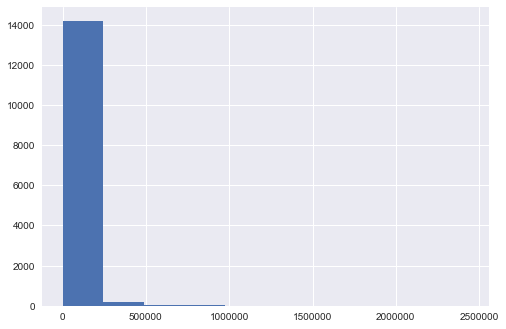

In [20]:
plt.hist(channelsinfo.channel_followers, bins=10)

(array([  1.43590000e+04,   5.80000000e+01,   1.70000000e+01,
          1.10000000e+01,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  3.00000000e+00,   4.45570404e+07,   8.91140778e+07,
          1.33671115e+08,   1.78228153e+08,   2.22785190e+08,
          2.67342227e+08,   3.11899265e+08,   3.56456302e+08,
          4.01013340e+08,   4.45570377e+08,   4.90127414e+08,
          5.34684452e+08,   5.79241489e+08,   6.23798527e+08,
          6.68355564e+08,   7.12912601e+08,   7.57469639e+08,
          8.02026676e+08,   8.46583714e+08,   8.91140751e+08]),
 <a list of 20 Patch objects>)

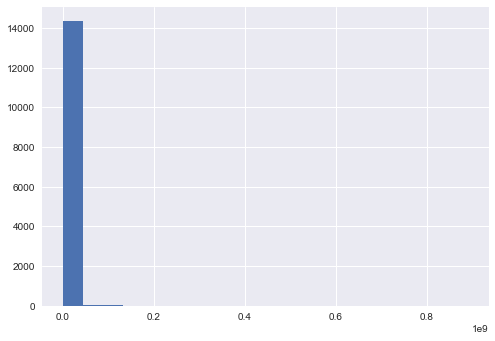

In [21]:
plt.hist(channelsinfo.channel_views, bins=20)

(array([  363.,   820.,  1073.,  1188.,  1528.,  1338.,  1441.,  1243.,
         1271.,  1066.,   917.,   709.,   451.,   239.,   183.,   196.,
          137.,   104.,    74.,   111.]),
 array([   10.,   191.,   372.,   553.,   734.,   915.,  1096.,  1277.,
         1458.,  1639.,  1820.,  2001.,  2182.,  2363.,  2544.,  2725.,
         2906.,  3087.,  3268.,  3449.,  3630.]),
 <a list of 20 Patch objects>)

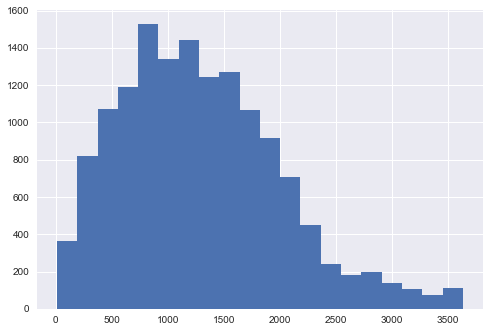

In [22]:
plt.hist(channelsinfo.channel_days, bins=20)

(array([  1.41250000e+04,   2.21000000e+02,   5.50000000e+01,
          1.60000000e+01,   1.10000000e+01,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  2.81069165e-02,   1.61794971e+02,   3.23561835e+02,
          4.85328699e+02,   6.47095562e+02,   8.08862426e+02,
          9.70629290e+02,   1.13239615e+03,   1.29416302e+03,
          1.45592988e+03,   1.61769675e+03,   1.77946361e+03,
          1.94123047e+03,   2.10299734e+03,   2.26476420e+03,
          2.42653107e+03,   2.58829793e+03,   2.75006479e+03,
          2.91183166e+03,   3.07359852e+03,   3.23536538e+03]),
 <a list of 20 Patch objects>)

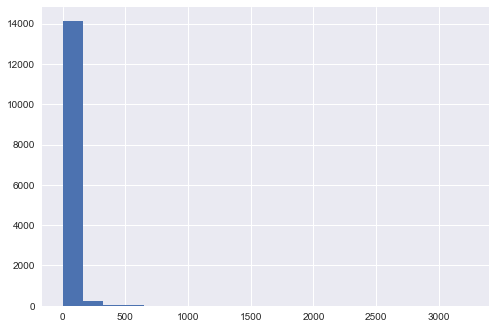

In [23]:
plt.hist(channelsinfo.follower_per_day, bins=20)

(array([  1.43510000e+04,   5.90000000e+01,   1.90000000e+01,
          1.00000000e+01,   6.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.04239055e-03,   2.63028567e+04,   5.26057123e+04,
          7.89085680e+04,   1.05211424e+05,   1.31514279e+05,
          1.57817135e+05,   1.84119991e+05,   2.10422846e+05,
          2.36725702e+05,   2.63028557e+05,   2.89331413e+05,
          3.15634269e+05,   3.41937124e+05,   3.68239980e+05,
          3.94542836e+05,   4.20845691e+05,   4.47148547e+05,
          4.73451403e+05,   4.99754258e+05,   5.26057114e+05]),
 <a list of 20 Patch objects>)

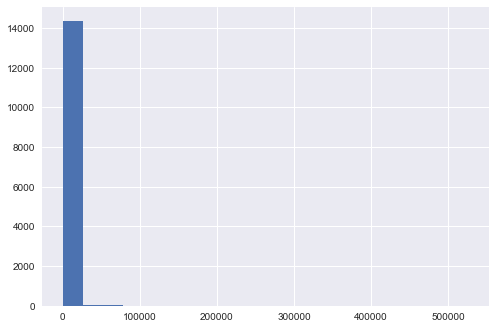

In [24]:
plt.hist(channelsinfo.view_per_day, bins=20)

(array([  1.38320000e+04,   3.77000000e+02,   1.15000000e+02,
          5.40000000e+01,   3.10000000e+01,   1.20000000e+01,
          7.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00]),
 array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
         1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
         2.7 ,  2.85,  3.  ]),
 <a list of 20 Patch objects>)

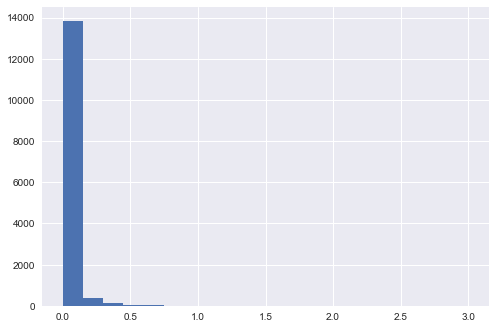

In [25]:
plt.hist(channelsinfo.view_per_follower_per_day, bins=20, range = [0,3])

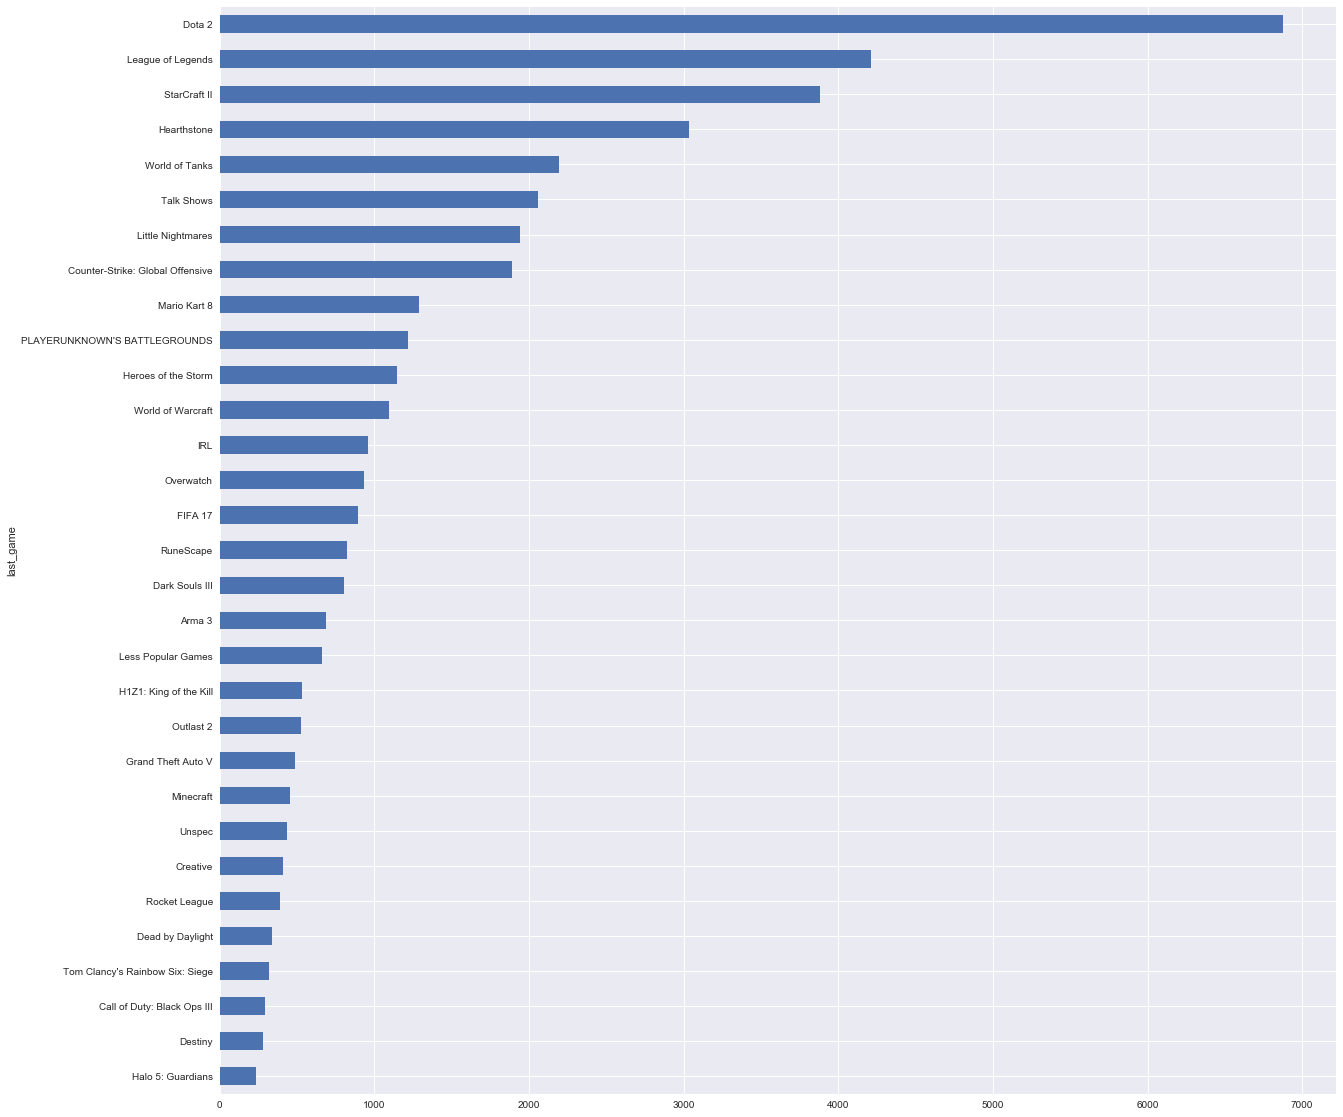

In [26]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['view_per_day'].mean().sort_values(ascending=True).plot.barh()

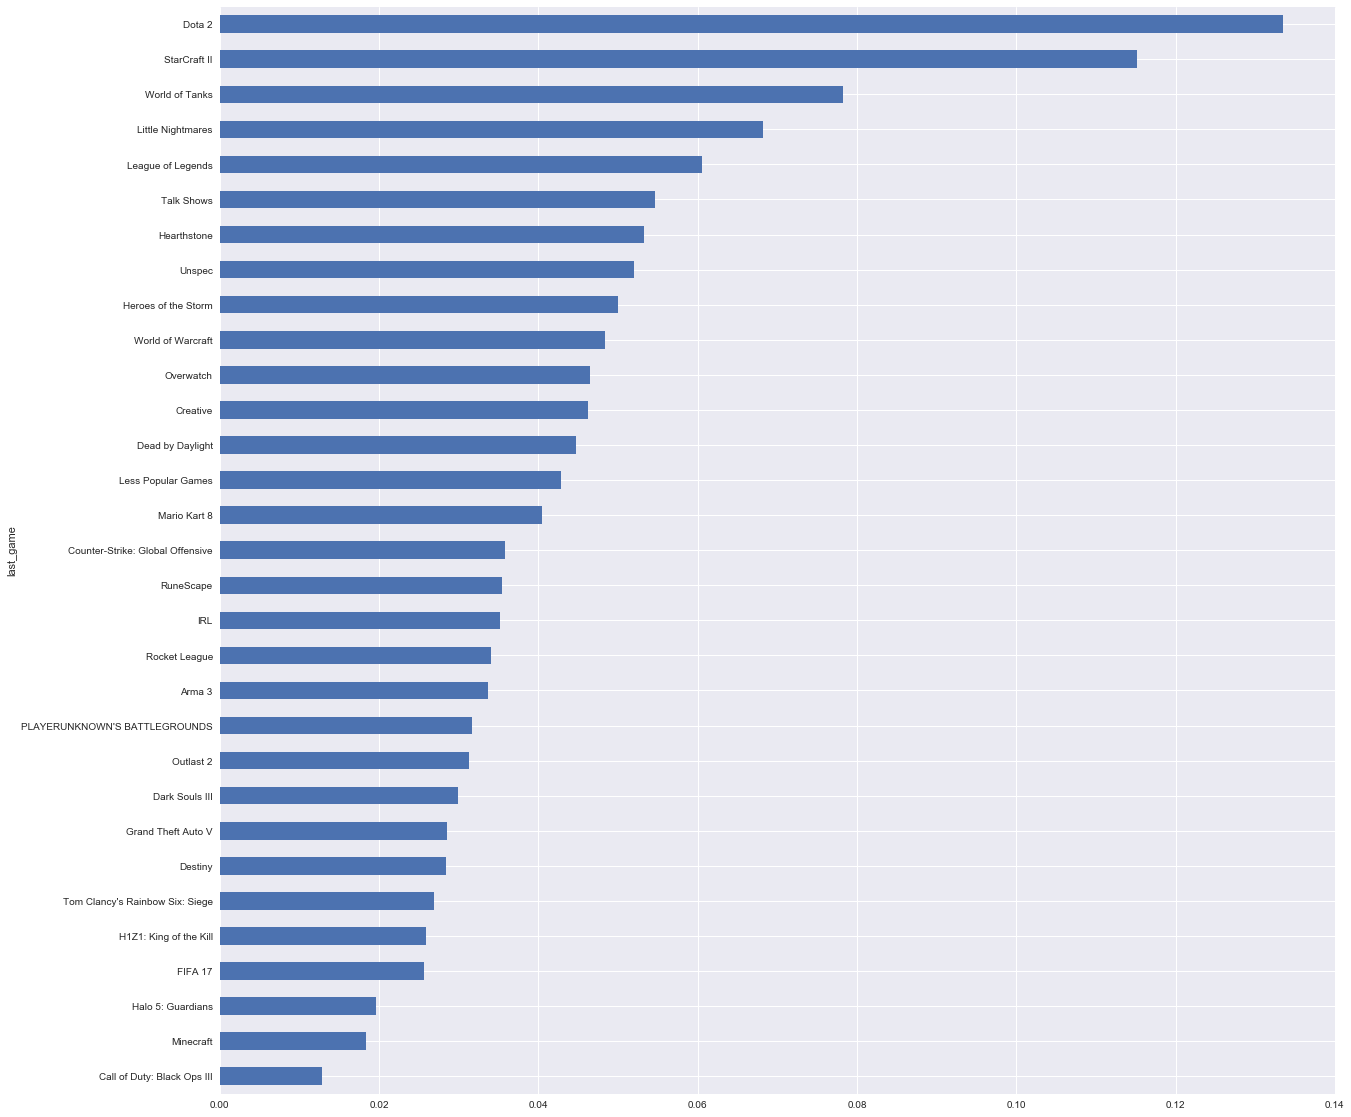

In [27]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['view_per_follower_per_day'].mean().sort_values(ascending=True).plot.barh()

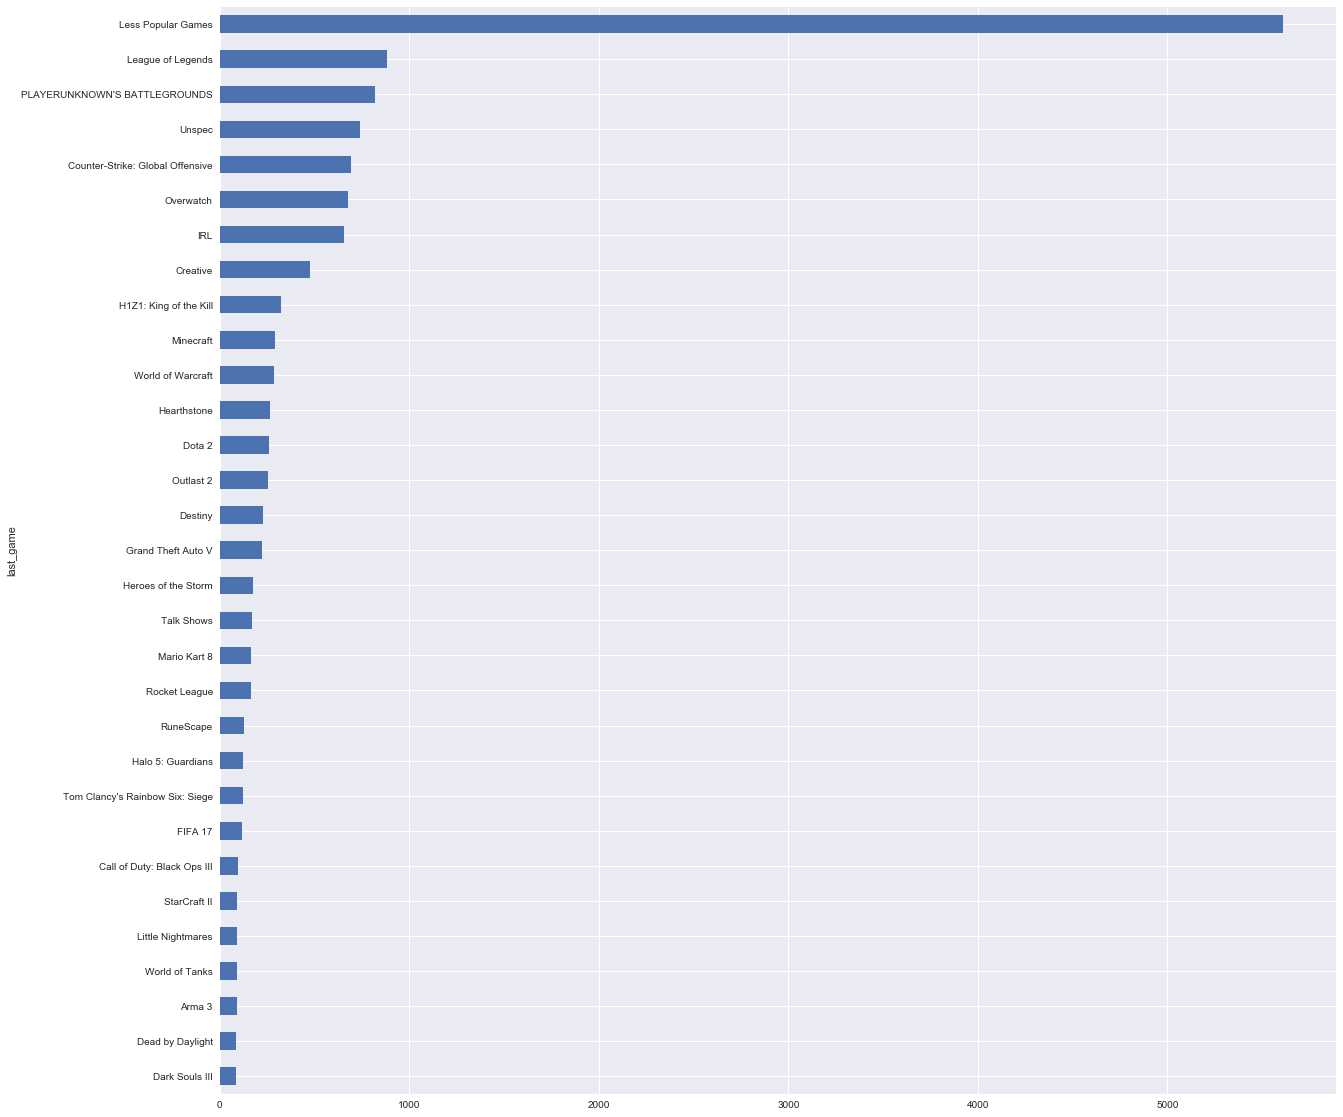

In [28]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['last_game'].count().sort_values(ascending=True).plot.barh()

(0, 0.2)

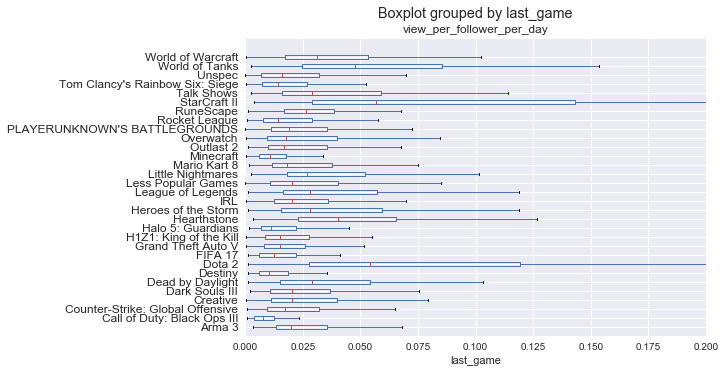

In [143]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['last_game', 'view_per_follower_per_day']]
df_channelsinfo.boxplot(by='last_game', column='view_per_follower_per_day',vert=0)
plt.ylim((0,33))
plt.xlim((0,0.2))

(0, 0.2)

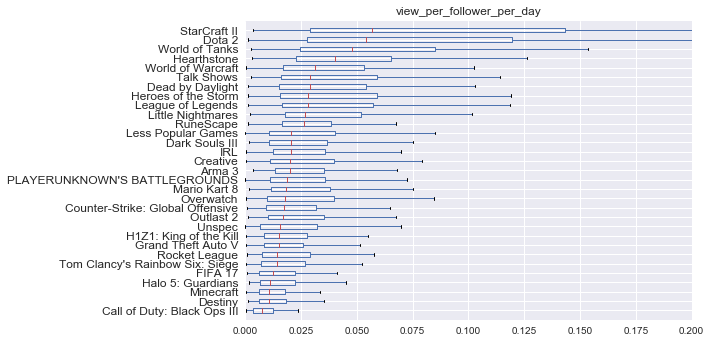

In [153]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes",vert=0)

df_channelsinfo = channelsinfo[['last_game', 'view_per_follower_per_day']]
axes = boxplot_sorted(df_channelsinfo, by=["last_game"], column="view_per_follower_per_day")
axes.set_title("view_per_follower_per_day")
axes.set_ylim([0,32])
axes.set_xlim([0,0.2])

(0, 4000)

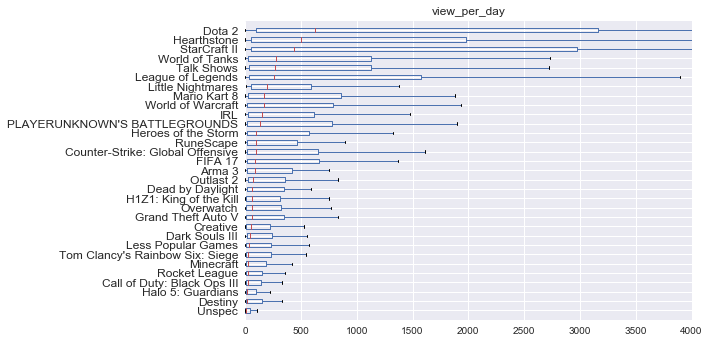

In [165]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes",vert=0)

df_channelsinfo = channelsinfo[['last_game', 'view_per_day']]
axes = boxplot_sorted(df_channelsinfo, by=["last_game"], column="view_per_day")
axes.set_title("view_per_day")
axes.set_ylim([0,32])
axes.set_xlim([0,4000])

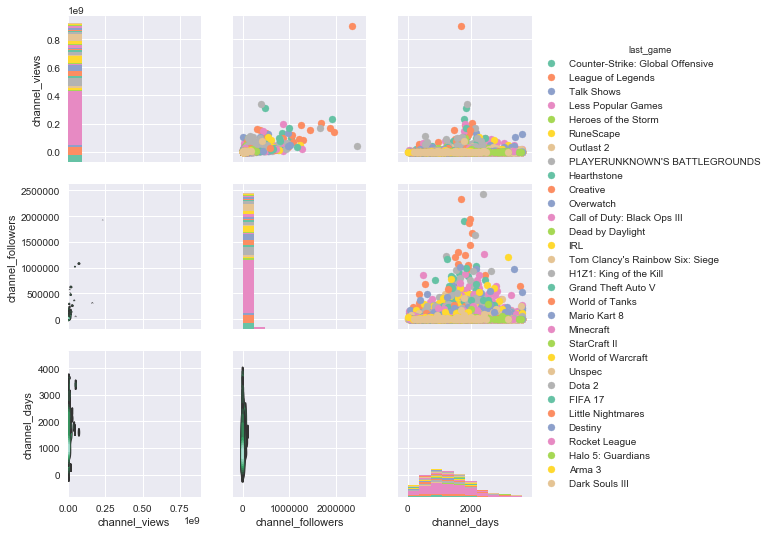

In [103]:
channelsinfo_pg = channelsinfo.loc[:,['channel_views','channel_followers','channel_days','last_game']]
g = sns.PairGrid(channelsinfo_pg, hue = 'last_game', palette='Set2')

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

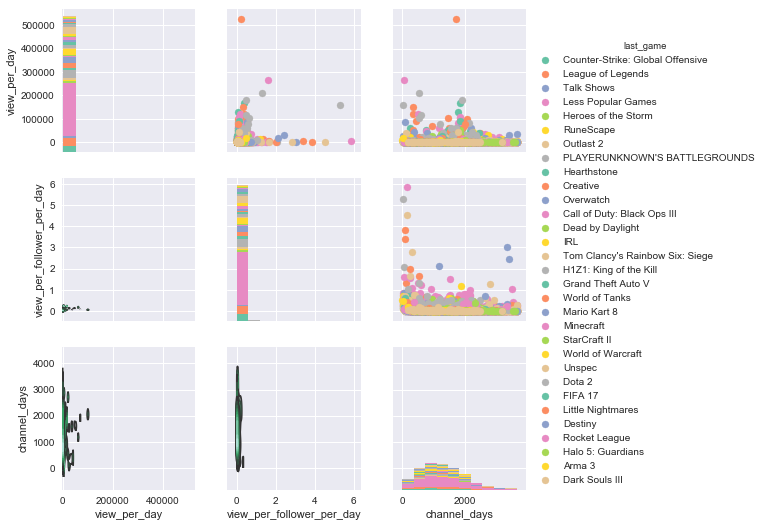

In [29]:
channelsinfo_pg = channelsinfo.loc[:,['view_per_day','view_per_follower_per_day','channel_days','last_game']]
g = sns.PairGrid(channelsinfo_pg, hue = 'last_game', palette='Set2')

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

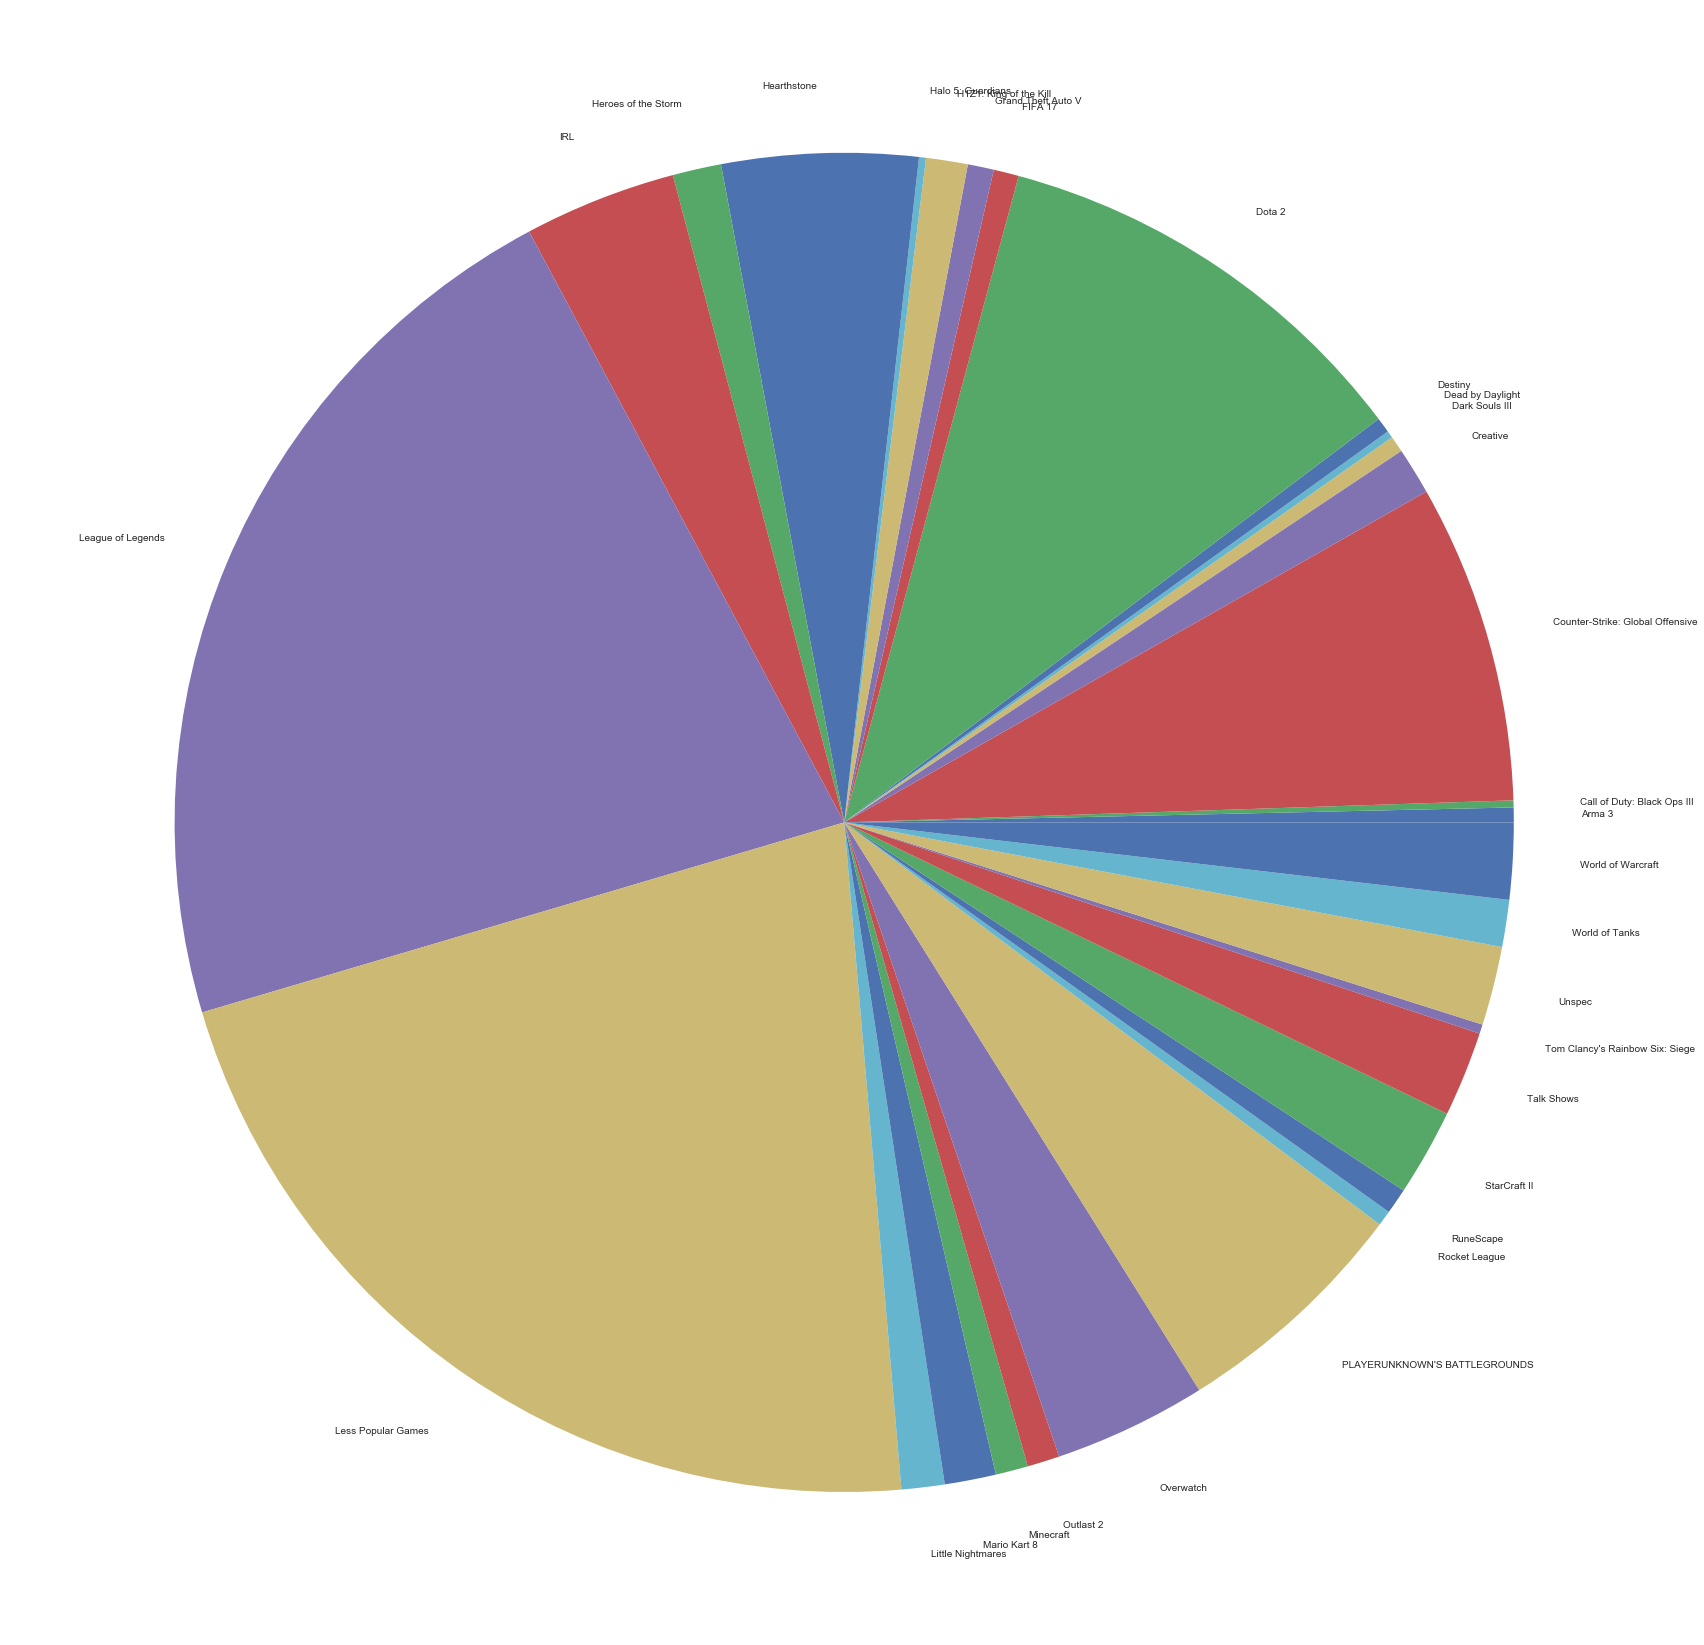

In [37]:
plt.figure(figsize=(30,30))
sums = channelsinfo.groupby('last_game')['view_per_day'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

## Graph Nodes Edges Prep

Eventually the channel-team interaction will be visualized with interactive graphs, so the 'node' and 'edge' data are being prepared here.

In [43]:
channelsinfo['nteams'] = map(lambda s: len(s.split(';')), channelsinfo.teams_joined)

channelsinfo.teams_joined.str.replace('did not join any team','')
channelsinfo.teams_joined = channelsinfo.teams_joined.str.replace('did not join any team','')

channelsinfo.loc[channelsinfo.teams_joined == '','nteams'] = 0 # otherwise 1 team and no team are the same

channelsinfo.loc[:,['teams_joined','nteams']].head()

,teams_joined,nteams
0,Polskie Strumyki,1
1,,0
2,,0
3,Creeper Crew;Creators;Game Artists,3
4,Keep Gaming,1


In [18]:
# a few teams have a space in front of their names
print teamsinfo.team_name[1608]
teamsinfo.team_name = teamsinfo.team_name.str.strip()   #teamsinfo.team_name[1608]
teamsinfo.team_name[1608]

 Swedish Meatballs


'Swedish Meatballs'

In [19]:
S = channelsinfo.teams_joined
S.head()

c2g = pd.DataFrame([],[], columns=list('cg'))
for i,s in enumerate(S):
    if s:
        gl = s.split(';')  
        n  = len(gl)
        #print gl

#         print i
#         print gi
#         print gl
        gl_i = []
        for g in gl:

            try:
                dummy = teamsinfo.team_name[teamsinfo.team_name == g].index[0]
#                 print dummy
                gl_i.append(dummy)
#                 print gl_i
            except:
#                 print gi
#                 print gl
                print ("did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them")
#                 print g
                pass
#             print(gl_i)
#             print 'complete %d' % i
        
        # here form the (ci, gi) pair
        # ci = i, gi = gl_i
#         print [i] * len(gl_i)
#         print gl_i
        ci = [i] * len(gl_i)
        dff = pd.DataFrame({'c':ci, 'g':gl_i})
        c2g = c2g.append(dff)

        #gi = [teamsinfo.team_name[teamsinfo.team_name == g].index[0] for g in gl]


did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them
did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them
did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them


In [20]:
c2g = c2g.reset_index(drop=True).astype(int)

c2g.head()  # this is the 'links' data frame 

,c,g
0,0,2112
1,3,1865
2,3,2097
3,3,1814
4,4,1470


In [37]:
# this needs to be moved
c2g.to_csv('testc2g.csv')
channelsinfo.to_csv('channelsinfo_clean.csv')

In [39]:
channelsinfo.last_game.str.startswith('\n\t\t').sum()
ind_no_lg = channelsinfo.last_game.str.startswith('\n\t\t')
# some info are in wrong columns, but luckily no info is missing
# this happened because of how my scraping code was wrote
channelsinfo.loc[ind_no_lg,"twitch_url"] = channelsinfo.loc[ind_no_lg,"account_updated_date"]
channelsinfo.loc[ind_no_lg,"account_updated_date"] = channelsinfo.loc[ind_no_lg,"last_game"]
channelsinfo.loc[ind_no_lg,"last_game"] = 'Unknown'

In [40]:
channelsinfo.sort_values('channel_followers', ascending=False).head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid
14423,True,https://www.twitchtools.com/channel/syndicate,Syndicate,"April 29, 2017, 14:35 GMT+0000",,H1Z1: King of the Kill,2435494,16764225,https://www.twitch.tv/syndicate,39179485,False,"October 17, 2010, 23:19 GMT+0000",syndicate
14424,True,https://www.twitchtools.com/channel/riotgames,Riot Games,"April 29, 2017, 13:34 GMT+0000",League of Legends Championship S;Riot Games,League of Legends,2324203,36029255,https://www.twitch.tv/riotgames,891140751,False,"September 8, 2012, 06:53 GMT+0000",riotgames
14425,True,https://www.twitchtools.com/channel/summit1g,summit1g,"April 29, 2017, 14:34 GMT+0000",1G SQUAD;Corsair,League of Legends,1947932,26490481,https://www.twitch.tv/summit1g,137037545,True,"December 1, 2011, 06:33 GMT+0000",summit1g
14426,True,https://www.twitchtools.com/channel/esl_csgo,ESL_CSGO,"April 29, 2017, 14:35 GMT+0000",ESL Gaming;CS:GO Professional Player Stream;ES...,Counter-Strike: Global Offensive,1912267,31239503,https://www.twitch.tv/esl_csgo,231660050,False,"June 11, 2012, 13:36 GMT+0000",esl_csgo
14427,True,https://www.twitchtools.com/channel/nightblue3,Nightblue3,"April 29, 2017, 14:35 GMT+0000",The Round Table,League of Legends,1859473,26946000,https://www.twitch.tv/nightblue3,169144719,False,"December 21, 2011, 18:18 GMT+0000",nightblue3


In [43]:
channelsinfo.groupby('last_game')['last_game'].count().sort_values(ascending=False).head()

last_game
League of Legends                   880
PLAYERUNKNOWN'S BATTLEGROUNDS       818
Unknown                             741
Counter-Strike: Global Offensive    693
Overwatch                           674
Name: last_game, dtype: int64

In [23]:
plt.hist(channelsinfo.last_game)

TypeError: len() of unsized object

In [59]:
pd.DataFrame([],[], columns=list('cg'))

,c,g


In [58]:
import pandas as pd
a = []
a.extend([1])
a

b = [2101, 1817, 1353, 1756, 1844, 1951]
i = 5

df  = pd.DataFrame([],[], columns=list('AB'),dtype='int32')
df2 = pd.DataFrame({'A': [1,3,4], 'B': [30,40,50]})

# df2 = pd.DataFrame([1,3,4],[30,40,50])
print df
print df2
df.append(df2, dtype='int32')

Empty DataFrame
Columns: [A, B]
Index: []
   A   B
0  1  30
1  3  40
2  4  50


TypeError: append() got an unexpected keyword argument 'dtype'

In [65]:
# teamsinfo.team_name[teamsinfo.team_name == 'Swedish Meatballs'].index[0]
print teamsinfo.team_name[1605:1615]

teamsinfo.team_name[1608]

1605            Supremes Network
1606                       Blink
1607          Mario Kart Players
1608           Swedish Meatballs
1609    Combros Stream Community
1610                     Rated G
1611        Playing Ducks e.V. ®
1612                 JuiceGaming
1613                   ReSync.TV
1614            Twitch Musicians
Name: team_name, dtype: object


' Swedish Meatballs'

In [51]:
teamsinfo.head()
dummy = teamsinfo.team_name
dummy[dummy == 'Counter Logic Gaming'].index[0]

2065

In [48]:
np.repeat(2,3,axis=0)

array([2, 2, 2])

In [ ]:
(2, 3)

In [ ]:
(2, 3)

In [ ]:
# generating channel-to-group pointers 'c2g'. This is essentially the 'edges' in a graph
def c2g(S,sep):
    # input S is a pandas series, sep is the separater used to split string
    for i,s in enumerate(S):
        if s:
            gl = s.split(';')  # gl --  group list
            n  = len(gl)
            for g in gl:
                find gl in groupinfo
            data.frame(cbind(rep(i,n), index_list_g))
            attach zip to the end of a data frame 
    return data frame
            


In [60]:
print teams.dtypes
print teams.describe()
teams.head()

subfolder    object
thumbnail    object
teamname     object
nmembers     object
dtype: object
            subfolder                 thumbnail    teamname   nmembers
count            2141                      2141        2141       2141
unique           2141                      1517        2127         61
top     /team/badidea  /theme/images/avatar.png  Green Team  1 members
freq                1                       625           2        818


,subfolder,thumbnail,teamname,nmembers
0,/team/hardrandom,https://static-cdn.jtvnw.net/jtv_user_pictures...,Hard Random,1 members
1,/team/virtuous,https://static-cdn.jtvnw.net/jtv_user_pictures...,Virtuous,1 members
2,/team/geekgamertv,https://static-cdn.jtvnw.net/jtv_user_pictures...,GeekGamer.TV,1 members
3,/team/pbwgaming,/theme/images/avatar.png,PBW Gaming,1 members
4,/team/slinkies,https://static-cdn.jtvnw.net/jtv_user_pictures...,The Slinkies,1 members


In [61]:
print teamsinfo.dtypes
print teamsinfo.describe()
teamsinfo.head()

team_created_date        object
subfolder_ls            float64
team_unique_id            int64
team_updated_date        object
team_members_ls          object
nfollowers_member_ls    float64
twitch_url               object
team_name                object
page_url                 object
dtype: object
       subfolder_ls  team_unique_id  nfollowers_member_ls
count           0.0     2139.000000                   0.0
mean            NaN     2134.845722                   NaN
std             NaN     1068.128161                   NaN
min             NaN        1.000000                   NaN
25%             NaN     1269.000000                   NaN
50%             NaN     2226.000000                   NaN
75%             NaN     3051.500000                   NaN
max             NaN     4010.000000                   NaN


,team_created_date,subfolder_ls,team_unique_id,team_updated_date,team_members_ls,nfollowers_member_ls,twitch_url,team_name,page_url
0,"February 22, 2015, 19:45 GMT+0000",NaN,1862,"February 23, 2015, 20:28 GMT+0000",NaN,NaN,https://www.twitch.tv/team/hardrandom,Hard Random,https://www.twitchtools.com/team/hardrandom
1,"May 8, 2014, 11:14 GMT+0000",NaN,1160,"June 25, 2014, 00:12 GMT+0000",NaN,NaN,https://www.twitch.tv/team/virtuous,Virtuous,https://www.twitchtools.com/team/virtuous
2,"March 11, 2014, 19:09 GMT+0000",NaN,1037,"February 17, 2015, 03:34 GMT+0000",Original_Gamester,NaN,https://www.twitch.tv/team/geekgamertv,GeekGamer.TV,https://www.twitchtools.com/team/geekgamertv
3,"August 16, 2015, 16:46 GMT+0000",NaN,2307,"August 17, 2015, 13:13 GMT+0000",PvtWiggles,NaN,https://www.twitch.tv/team/pbwgaming,PBW Gaming,https://www.twitchtools.com/team/pbwgaming
4,"February 11, 2015, 06:33 GMT+0000",NaN,1827,"October 4, 2015, 20:27 GMT+0000",Slinned,NaN,https://www.twitch.tv/team/slinkies,The Slinkies,https://www.twitchtools.com/team/slinkies


In [13]:
len(channels['subfolder'])

14454

In [14]:
subpath

NameError: name 'subpath' is not defined

In [15]:
urls = 'https://www.twitchtools.com' + subpath

NameError: name 'subpath' is not defined

In [16]:
type(urls)

NameError: name 'urls' is not defined

In [17]:
import scrapy
import pandas as pd
from twitchtest.items import TwitchChannelInfoItem

# channel subfolder paths have been scraped from the twitchtest_spider, and saved in a csv file
# here we read in the csv file, assemble the full urls, and loop over them

class TwitchChannelInfoUrlsPrep():
    def __init__(self):
        pass

    def prep_urls(self):
        with open("twitchtools_channels.csv", "r") as f:
            channels = pd.read_csv(f)
        urls = 'https://www.twitchtools.com' + channels['subfolder']      # pandas.core.series.Series
        # urls = list('https://www.twitchtools.com' + channels['subfolder']) # list
        return urls

In [18]:
start_urls = TwitchChannelInfoUrlsPrep().prep_urls()

In [19]:
len(start_urls)

14454

In [20]:
type(start_urls)

pandas.core.series.Series

In [21]:
start_urls[2]

'https://www.twitchtools.com/channel/mirage720'

In [22]:
import pandas as pd
#import json

with open("twitchtools_teamsinfo.csv", "r") as f:
    #teamsinfo = pd.read_json(f)
    teamsinfo = pd.read_csv(f)

In [23]:
summary(teamsinfo)

NameError: name 'summary' is not defined

In [24]:
teamsinfo['team_members_ls']

0                                                     NaN
1                                                     NaN
2                                       Original_Gamester
3                                              PvtWiggles
4                                                 Slinned
5                                                  Patron
6                                        LaChevre_MasqueR
7                                                   Brian
8                                                     NaN
9                                                 TViSamy
10                                          Megaultrajman
11                                              Dakillzor
12                                                 アフロマスク
13                                          sharyl_sykora
14                                              Caprimint
15                                                Ardashe
16                                           DinahThatsMe
17            